# **Semiconductor Manufacturing Sensor Data Analysis**

# **Project Background**

In semiconductor manufacturing, numerous sensors continuously monitor the production line to ensure quality and efficiency. However, not all sensor readings provide valuable insights. Our task is to analyze this sensor data to predict whether a product will pass or fail quality testing.

# **About the Dataset**
**File: signal-data (1).csv**

**Size: 1567 samples (rows), each representing a single product**

**Features: 591 columns, each corresponding to a unique sensor reading**

**Target: Indicates product quality outcome**

*  **-1 → Product Passed**

*  **1 → Product Failed**

**Each row captures the sensor data for one product as it moves through the manufacturing process. Our goal is to use this information to accurately predict the product’s outcome.**

 # **Project Objective**

**We aim to develop a machine learning model that can reliably forecast if a semiconductor unit will pass or fail based on its sensor data. To achieve this, we will:**

* **Explore and clean the dataset thoroughly**
* **Identify the most important sensor readings through feature selection**
* **Experiment with various machine learning algorithms**
* **Select the best-performing model for deployment**

# **Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
import joblib
import scipy as stats

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving signal-data (1).csv to signal-data (1).csv


In [ ]:
df = pd.read_csv('/content/signal-data (1).csv')
print(df.head())

                  Time        0        1          2          3       4      5  \
0  2008-07-19 11:55:00  3030.93  2564.00  2187.7333  1411.1265  1.3602  100.0   
1  2008-07-19 12:32:00  3095.78  2465.14  2230.4222  1463.6606  0.8294  100.0   
2  2008-07-19 13:17:00  2932.61  2559.94  2186.4111  1698.0172  1.5102  100.0   
3  2008-07-19 14:43:00  2988.72  2479.90  2199.0333   909.7926  1.3204  100.0   
4  2008-07-19 15:22:00  3032.24  2502.87  2233.3667  1326.5200  1.5334  100.0   

          6       7       8  ...       581     582     583     584      585  \
0   97.6133  0.1242  1.5005  ...       NaN  0.5005  0.0118  0.0035   2.3630   
1  102.3433  0.1247  1.4966  ...  208.2045  0.5019  0.0223  0.0055   4.4447   
2   95.4878  0.1241  1.4436  ...   82.8602  0.4958  0.0157  0.0039   3.1745   
3  104.2367  0.1217  1.4882  ...   73.8432  0.4990  0.0103  0.0025   2.0544   
4  100.3967  0.1235  1.5031  ...       NaN  0.4800  0.4766  0.1045  99.3032   

      586     587     588       589  P

# EDA

In [ ]:
print("shape of dataset:", df.shape)

shape of dataset: (1567, 592)


In [ ]:
df.isna().sum().sum()

np.int64(41951)

In [ ]:
print("Data types of each column:")
print(df.dtypes.value_counts())

Data types of each column:
float64    590
object       1
int64        1
Name: count, dtype: int64


In [ ]:
print("Number of unique values in each column: ")
print(df.nunique().value_counts())

Number of unique values in each column: 
1       116
2         7
518       7
1551      6
1562      5
       ... 
954       1
128       1
722       1
65        1
652       1
Name: count, Length: 343, dtype: int64


In [ ]:
print("Total no. of unique values: ")
print(df.nunique().sum())

Total no. of unique values: 
374145


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 592 entries, Time to Pass/Fail
dtypes: float64(590), int64(1), object(1)
memory usage: 7.1+ MB
None


In [ ]:
constant = df.columns[df.nunique()<=1]
print(f"\nDropped {len(constant)} columns with only one unique value")
df.drop(columns=constant,inplace=True)


Dropped 116 columns with only one unique value


In [ ]:
df.shape

(1567, 476)

In [ ]:
df

,Time,0,1,2,3,4,6,7,8,9,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,97.6133,0.1242,1.5005,0.0162,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,102.3433,0.1247,1.4966,-0.0005,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,95.4878,0.1241,1.4436,0.0041,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,104.2367,0.1217,1.4882,-0.0124,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.3967,0.1235,1.5031,-0.0031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2008-10-16 15:13:00,2899.41,2464.36,2179.7333,3085.3781,1.4843,82.2467,0.1248,1.3424,-0.0045,...,203.1720,0.4988,0.0143,0.0039,2.8669,0.0068,0.0138,0.0047,203.1720,-1
1563,2008-10-16 20:49:00,3052.31,2522.55,2198.5667,1124.6595,0.8763,98.4689,0.1205,1.4333,-0.0061,...,NaN,0.4975,0.0131,0.0036,2.6238,0.0068,0.0138,0.0047,203.1720,-1
1564,2008-10-17 05:26:00,2978.81,2379.78,2206.3000,1110.4967,0.8236,99.4122,0.1208,NaN,NaN,...,43.5231,0.4987,0.0153,0.0041,3.0590,0.0197,0.0086,0.0025,43.5231,-1
1565,2008-10-17 06:01:00,2894.92,2532.01,2177.0333,1183.7287,1.5726,98.7978,0.1213,1.4622,-0.0072,...,93.4941,0.5004,0.0178,0.0038,3.5662,0.0262,0.0245,0.0075,93.4941,-1


In [ ]:
print("Information about the dataset:")
print(df.info())

Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 476 entries, Time to Pass/Fail
dtypes: float64(474), int64(1), object(1)
memory usage: 5.7+ MB
None


In [ ]:
print("summary statistics of the dataset:", df.describe())

summary statistics of the dataset:                  0            1            2            3            4  \
count  1561.000000  1560.000000  1553.000000  1553.000000  1553.000000   
mean   3014.452896  2495.850231  2200.547318  1396.376627     4.197013   
std      73.621787    80.407705    29.513152   441.691640    56.355540   
min    2743.240000  2158.750000  2060.660000     0.000000     0.681500   
25%    2966.260000  2452.247500  2181.044400  1081.875800     1.017700   
50%    3011.490000  2499.405000  2201.066700  1285.214400     1.316800   
75%    3056.650000  2538.822500  2218.055500  1591.223500     1.525700   
max    3356.350000  2846.440000  2315.266700  3715.041700  1114.536600   

                 6            7            8            9           10  ...  \
count  1553.000000  1558.000000  1565.000000  1565.000000  1565.000000  ...   
mean    101.112908     0.121822     1.462862    -0.000841     0.000146  ...   
std       6.237214     0.008961     0.073897     0.015116    

**Target Value Distribution**

In [ ]:
print("distribution of target values: ")
print( df['Pass/Fail'].value_counts())

distribution of target values: 
Pass/Fail
-1    1463
 1     104
Name: count, dtype: int64


**Missing Values**

In [ ]:
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({'Missing Values': missing_values, 'Missing Percentage': missing_percentage},index=df.columns).sort_values(by='Missing Percentage', ascending=False)
print("top 10 columns with missing values",missing_df.head(10))

top 10 columns with missing values      Missing Values  Missing Percentage
157            1429           91.193363
293            1429           91.193363
292            1429           91.193363
158            1429           91.193363
492            1341           85.577537
220            1341           85.577537
85             1341           85.577537
358            1341           85.577537
382            1018           64.964901
109            1018           64.964901


**Data Cleaning**

In [ ]:
df.drop(columns=["Time"], inplace=True)

In [ ]:
# Drop columns with more than 50% missing values
df = df.loc[:, df.isnull().mean() < 0.5]

# Fill remaining missing values with mean
df.fillna(df.mean(), inplace=True)

# Identify and encode target column
target_col = df.columns[-1]
df[target_col] = df[target_col].map({-1: 0, 1: 1})  # 0 = Pass, 1 = Fail
print("\nTarget distribution:\n", df[target_col].value_counts())


Target distribution:
 Pass/Fail
0    1463
1     104
Name: count, dtype: int64


<ipython-input-51-bba2b638cd8f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fillna(df.mean(), inplace=True)
<ipython-input-51-bba2b638cd8f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[target_col] = df[target_col].map({-1: 0, 1: 1})  # 0 = Pass, 1 = Fail


In [ ]:
df.shape

(1567, 447)

**Filling missing values**

In [ ]:
df.fillna(df.mean(numeric_only=True), inplace=True)

<ipython-input-53-41ad60c38a98>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fillna(df.mean(numeric_only=True), inplace=True)


In [ ]:
print("Number of missing values:", df.isnull().sum().sum())

Number of missing values: 0


In [ ]:
print("Target distribution after changes:", df['Pass/Fail'].value_counts())

Target distribution after changes: Pass/Fail
0    1463
1     104
Name: count, dtype: int64


# Data Visualization

**Univariate**

<ipython-input-56-74aa10b6c274>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Pass/Fail'], palette=['pink','blue'])


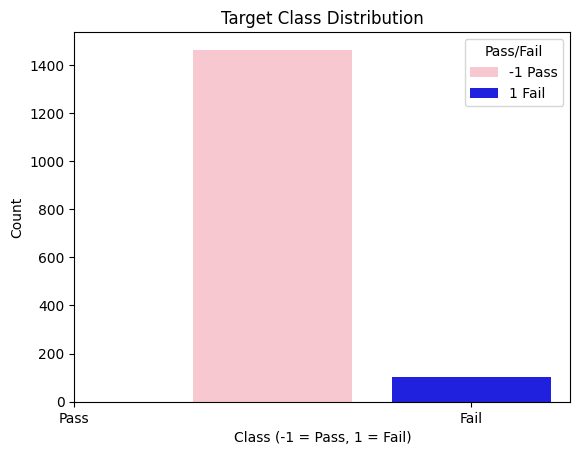

In [ ]:
sns.countplot(x=df['Pass/Fail'], palette=['pink','blue'])
plt.title("Target Class Distribution")
plt.xlabel("Class (-1 = Pass, 1 = Fail)")
plt.ylabel("Count")

# default axes
ax = plt.gca()

# locations are -1 & 1
ax.set_xticks([-1, 1])

# ticklabels
plt.gca().set_xticklabels(['Pass', 'Fail'])

labels = ['-1 Pass', '1 Fail']
plt.legend(labels, title='Pass/Fail')

plt.show()


Top 10 features with the highest correlation to 'Pass/Fail':
     Pass/Fail
59    0.155771
103   0.151196
510   0.131587
348   0.130108
431   0.120304
434   0.111609
430   0.109569
435   0.108573
21    0.107997
28   -0.106767
436   0.106426
129   0.103351
210   0.102488
298   0.102055
163   0.099876


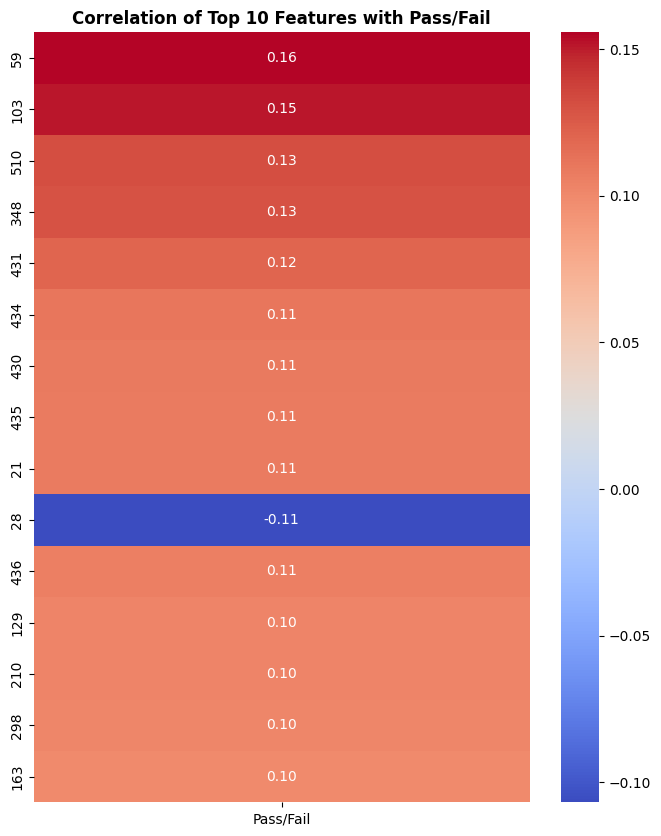

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Get the correlations with the target variable 'Pass/Fail'
target_correlation = correlation_matrix['Pass/Fail'].sort_values(ascending=False)

# Drop the correlation of 'Pass/Fail'
target_correlation = target_correlation.drop('Pass/Fail')

# USING HIGHEST ABSOLUTE to get proper 20 features
top_10_features = target_correlation.abs().nlargest(15).index

# filtering to get only top20 vLUES
top_10_corr_matrix = correlation_matrix.loc[top_10_features, ['Pass/Fail']]

# 10 features
print("\nTop 10 features with the highest correlation to 'Pass/Fail':")
print(top_10_corr_matrix)

# plotting a heatmap to get better visuals
plt.figure(figsize=(8, 10))
sns.heatmap(top_10_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation of Top 10 Features with Pass/Fail', fontweight='bold')
plt.show()

* **Features 59, 103, 510, 348, and 431 have the strongest positive connections with the 'Pass/Fail' outcome, meaning that higher values in these features are generally linked to passing (or failing, depending on how the target is defined). On the other hand, features 28 and 316 show negative correlations, suggesting that higher values in these are associated with the opposite result.**

* **While these correlations are relatively small (the highest is about 0.156), these features still play an important role and are worth focusing on for feature engineering and building better models. Even small correlations can add valuable information when combined with other features**

Creating test and train data

In [ ]:
# Separating features (X) and target variable (y)
X=df.drop(columns="Pass/Fail")
y=df["Pass/Fail"]
print(X)
print(y)

            0        1          2          3       4         6       7  \
0     3030.93  2564.00  2187.7333  1411.1265  1.3602   97.6133  0.1242   
1     3095.78  2465.14  2230.4222  1463.6606  0.8294  102.3433  0.1247   
2     2932.61  2559.94  2186.4111  1698.0172  1.5102   95.4878  0.1241   
3     2988.72  2479.90  2199.0333   909.7926  1.3204  104.2367  0.1217   
4     3032.24  2502.87  2233.3667  1326.5200  1.5334  100.3967  0.1235   
...       ...      ...        ...        ...     ...       ...     ...   
1562  2899.41  2464.36  2179.7333  3085.3781  1.4843   82.2467  0.1248   
1563  3052.31  2522.55  2198.5667  1124.6595  0.8763   98.4689  0.1205   
1564  2978.81  2379.78  2206.3000  1110.4967  0.8236   99.4122  0.1208   
1565  2894.92  2532.01  2177.0333  1183.7287  1.5726   98.7978  0.1213   
1566  2944.92  2450.76  2195.4444  2914.1792  1.5978   85.1011  0.1235   

             8         9        10  ...     576      577     582     583  \
0     1.500500  0.016200 -0.003400 

In [ ]:
# Target Distribution before SMOTE
print("Target Distribution before SMOTE:")
print(y.value_counts())


Target Distribution before SMOTE:
Pass/Fail
0    1463
1     104
Name: count, dtype: int64


In [ ]:
# Applying SMOTE to generate synthetic samples for the minority class in training data
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

In [ ]:
print("\nTarget Distribution after SMOTE:")
print(y_balanced.value_counts())


Target Distribution after SMOTE:
Pass/Fail
0    1463
1    1463
Name: count, dtype: int64


In [ ]:
#  Split the data into training and testing sets

# Using stratify=y to maintain the same class distribution in both sets

X_train,X_test,y_train,y_test=train_test_split(X_balanced,y_balanced,test_size=0.2,random_state=42, stratify = y_balanced)


In [ ]:
y_train[0:5]

,Pass/Fail
752,0
1165,0
590,0
797,1
624,0


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler() #Scaling the dataset so all features remains on same scale

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(X_train_scaled)
print(X_test_scaled)

[[-0.78674205 -0.29788461  1.93384845 ... -1.45790687 -1.46363401
  -0.6589037 ]
 [ 0.81733952  0.62335977 -0.91505308 ...  0.45337231  1.26303774
  -0.26573775]
 [-1.64476864  1.1152286  -1.51182181 ...  0.22851594  0.21132149
  -0.30740766]
 ...
 [ 0.09818591 -0.78025899  0.90745274 ... -0.7583537  -0.68458494
  -0.27979245]
 [ 0.06832681 -0.40785009  0.65570196 ...  0.01615158 -0.02239323
   0.9756684 ]
 [ 0.61283285  1.15292295  0.26156554 ... -0.28365691 -0.02239323
  -0.22865791]]
[[-0.0710979   2.94422872 -0.97134475 ... -0.0528408   0.17085582
   2.20995228]
 [ 0.38179922 -2.21156123  2.88315856 ... -1.39097808 -1.30975186
  -0.62470921]
 [-0.15195448  0.07664991  1.31107932 ... -1.24554251 -1.22991929
  -0.84911638]
 ...
 [ 2.88747657  0.37962183  0.01765945 ...  1.14043345  1.34094264
   1.5550223 ]
 [ 0.48212062  1.72089842 -0.72422601 ...  3.57672242  2.63624437
   0.76646854]
 [-1.12307946  0.42185085 -0.00379831 ... -0.28365691 -0.02239323
  -0.22865791]]


In [ ]:
# Dimensionality Reduction (optional but useful)
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)


Building model

In [ ]:
# Model Training & Evaluation
models = {
    "RandomForest": RandomForestClassifier(random_state=42),
    "SVM": SVC(random_state=42),
    "NaiveBayes": GaussianNB()
}

best_model = None
best_score = 0

for name, model in models.items():
    print(f"\nTraining {name}...")
    scores = cross_val_score(model, X_train_pca, y_train, cv=5)
    print(f"Cross-validation Accuracy: {scores.mean():.4f}")

    # GridSearch for RandomForest and SVM
    if name == "RandomForest":
        params = {"n_estimators": [100, 200], "max_depth": [10, 20, None]}
    elif name == "SVM":
        params = {"C": [0.1, 1, 10], "kernel": ["linear", "rbf"]}
    else:
        params = None

    if params:
        grid = GridSearchCV(model, params, cv=5)
        grid.fit(X_train_pca, y_train)
        model = grid.best_estimator_
        print("Best Params:", grid.best_params_)
    else:
        model.fit(X_train_pca, y_train)

    y_pred = model.predict(X_test_pca)
    print(classification_report(y_test, y_pred))

    acc = model.score(X_test_pca, y_test)
    if acc > best_score:
        best_score = acc
        best_model = model


Training RandomForest...
Cross-validation Accuracy: 0.9906
Best Params: {'max_depth': 20, 'n_estimators': 100}
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       293
           1       1.00      0.99      0.99       293

    accuracy                           0.99       586
   macro avg       0.99      0.99      0.99       586
weighted avg       0.99      0.99      0.99       586


Training SVM...
Cross-validation Accuracy: 0.9829
Best Params: {'C': 10, 'kernel': 'rbf'}
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       293
           1       0.98      1.00      0.99       293

    accuracy                           0.99       586
   macro avg       0.99      0.99      0.99       586
weighted avg       0.99      0.99      0.99       586


Training NaiveBayes...
Cross-validation Accuracy: 0.9534
              precision    recall  f1-score   support

           0       0.87      0

*Best Model: RandomForest*

*Accuracy: 0.9906*